<a href="https://colab.research.google.com/github/SomeshRao007/PROACTIVE-AUTOSCALING-FOR-HIGH-WEB-TRAFFIC-ENVIRONMENTS-A-TRANSFORMERS-BASED-APPROACH/blob/main/TrnasformersNASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from numpy import log


print(os.listdir(r"/content/drive/MyDrive/Colab_Notebooks"))

['access_log_Jul95.csv', 'access_log_Aug95.csv', 'Somewhat_Homomorphic_Encryption_Toy.ipynb', 'NETPIE2020_Pub_Sub_demo.ipynb', 'nasa-access-log (1).ipynb', 'Untitled0.ipynb', 'nasa-access-log.ipynb', 'NASAD1.csv', 'NASAD5.csv', 'NASA DATASET.ipynb - Colaboratory.pdf', 'NASA_DS_countPri.csv', 'Transformers', 'NASA_DS_count_RF.csv', 'NASA_DS_count.csv', 'NASA_DS_count_ARIMA.csv', 'NASA July ARIMA.ipynb']


In [ ]:
!pip install scikit-learn
!pip install skforecast
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.8/424.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.6 MB/s eta 0:00:00


In [ ]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#import hvplot.pandas
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Modelling and forecasting
# ==============================================================================
!pip install scikit-forecast
import skforecast

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from pmdarima import ARIMA

# Warnings config
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

ERROR: Could not find a version that satisfies the requirement scikit-forecast (from versions: none)
ERROR: No matching distribution found for scikit-forecast


In [ ]:
# Libraries
# ======================================================================================
import numpy as np
import pandas as pd
from io import StringIO
import contextlib
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# pmdarima
from pmdarima import ARIMA
from pmdarima import auto_arima

# statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# skforecast
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from sklearn.metrics import mean_absolute_error

import warnings

In [ ]:
!pip install torchvision
!pip install tensorflow

!pip install --upgrade tensorflow




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.1 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully

In [ ]:

# def process_csv_file(file_path, nRowsRead=None):
#     # Read the CSV file

#     df = pd.read_csv(file_path, delimiter=' ', nrows=nRowsRead, header=None, names=np.arange(11),encoding_errors='ignore')

#     # Drop unnecessary columns
#     df.drop(df.columns[[1, 2, 4,8,9,10]], axis=1, inplace=True)
#     # df.drop(df.columns[1] == '[',axis=2,inplace=True )

#     # Rename columns
#     df.columns = ['IP', 'Timestamp', 'Request', 'Response', 'DurationServed']

#     # Extract HTTP Method
#     df['HTTP Method'] = df['Request'].str.extract(r'^(GET|POST|PUT|DELETE)')

#     # Remove HTTP Method from Request
#     df['Request'] = df['Request'].str.replace(r'^(GET|POST|PUT|DELETE)\s+', '')

#     return df


# nRowsRead = 100000  # specify 'None' if you want to read the entire file 1048575
# file_path = "/content/drive/MyDrive/Colab_Notebooks/access_log_Jul95.csv"
# df = process_csv_file(file_path, nRowsRead)
# df.dataframeName = 'data.csv'


# df.info()
# df.head(10)

In [ ]:
# df['Timestamp'] = pd.to_datetime(df['Timestamp'].str.replace('[','').str.replace('?',''), format='%d/%b/%Y:%H:%M:%S')
# df = df.set_index('Timestamp')
# df = df.resample('1T').count()
# df.drop(df.columns[[0,1,3,4]], axis=1, inplace=True)
# df.head(5)
# # df.info()
# # df.to_csv("/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count.csv", encoding ='utf-8',index= False)

In [ ]:
# df.head(5)

In [ ]:
# plt.figure(figsize=(12,4)) # create a figure with width 6 inches and height 4 inches

# # plotPerColumnDistribution(df,5,5)
# # plotCorrelationMatrix(df, 8)
# # plotScatterMatrix(df, 5, 10)
# import matplotlib.pyplot as plt
# import datetime
# plt.plot(df['Response'])
# plt.xticks(rotation=30, ha='right')
# plt.xlabel('Time') # add a label to the x-axis
# plt.ylabel('Requests') # add a label to the y-axis
# plt.title('Requests vs Time') # add a title to the plot


# # print(df.columns)

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
#model
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import random
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

set_seed(42)

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res


def transformer(
            input_shape,
            head_size,
            num_heads,
            ff_dim,
            num_transformer_blocks,
            mlp_units,
            dropout=0,
            mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

In [ ]:
# !pip install tensorflow-gpu


In [ ]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())


In [ ]:
# physical_devices = tf.config.list_physical_devices('GPU')
# if len(physical_devices) > 0:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [ ]:
# import os
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from sklearn.model_selection import train_test_split

# # Define the constants
# N_DAYS = 60  # Adjust according to your model's input shape
# SAVE_NAME = "my_model"

# # Define the environment variables for CUDA (if you are using GPU)
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# # Define your data processing function
# def process_csv_file(file_path, nRowsRead=None):
#     df = pd.read_csv(file_path, delimiter=' ', nrows=nRowsRead, header=None, names=np.arange(11), encoding_errors='ignore')
#     df.drop(df.columns[[1, 2, 4, 8, 9, 10]], axis=1, inplace=True)
#     df.columns = ['IP', 'Timestamp', 'Request', 'Response', 'DurationServed']
#     df['HTTP Method'] = df['Request'].str.extract(r'^(GET|POST|PUT|DELETE)')
#     df['Request'] = df['Request'].str.replace(r'^(GET|POST|PUT|DELETE)\s+', '')
#     return df

# # Process the data
# nRowsRead = None
# file_path = "/content/drive/MyDrive/Colab_Notebooks/access_log_Jul95.csv"
# df = process_csv_file(file_path, nRowsRead)

# # Process Timestamp and Response for time series
# df['Timestamp'] = pd.to_datetime(df['Timestamp'].str.replace('[','').str.replace('?',''), format='%d/%b/%Y:%H:%M:%S')
# df = df.set_index('Timestamp')
# df = df.resample('1T').count()
# df.drop(df.columns[[0, 1, 3, 4]], axis=1, inplace=True)
# df.head(5)
# # df.info()
# df.to_csv("/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count.csv", encoding ='utf-8',index= False)

In [ ]:
import pandas as pd
import numpy as np

def process_csv_file(file_path, nRowsRead=None):
    df = pd.read_csv(file_path, delimiter=' ', nrows=nRowsRead, header=None, names=np.arange(11), encoding_errors='ignore')

    df.drop(df.columns[[1, 2, 4, 8, 9, 10]], axis=1, inplace=True)
    df.columns = ['IP', 'Timestamp', 'Request', 'Response', 'DurationServed']
    df['HTTP Method'] = df['Request'].str.extract(r'^(GET|POST|PUT|DELETE)')
    df['Request'] = df['Request'].str.replace(r'^(GET|POST|PUT|DELETE)\s+', '')

    return df

file_path = "/content/drive/MyDrive/Colab_Notebooks/access_log_Jul95.csv"
df = process_csv_file(file_path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'].str.replace('[','').str.replace('?',''), format='%d/%b/%Y:%H:%M:%S')
df = df.set_index('Timestamp')
df = df.resample('1T').count()
# df_resampled = df_resampled[['Response']]
# df_final = df_resampled.reset_index()
df.drop(df.columns[[0,1,3,4]], axis=1, inplace=True)

df = df.reset_index()
# df_final.head(5)
# df.to_csv("/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count.csv", encoding ='utf-8',index= False)

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count.csv", encoding ='utf-8',index= False)



df.head()


,Timestamp,Response
0,1995-07-01 00:00:00,42
1,1995-07-01 00:01:00,61
2,1995-07-01 00:02:00,57
3,1995-07-01 00:03:00,71
4,1995-07-01 00:04:00,70


In [ ]:


import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import warnings







df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count.csv',  parse_dates=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df.sort_index(inplace=True)

# # Exclude weekends
# df = df[df.index.dayofweek < 5]

# # Find the last Friday in the dataset
# last_friday = df[df.index.dayofweek == 4].index.max()
# start_of_last_week = last_friday - pd.Timedelta(days=4)
# data_train = df[:start_of_last_week]
# data_test = df[start_of_last_week:last_friday + pd.Timedelta(days=1)]

# Filter out weekends for training data
df_train_val = df[df.index.dayofweek < 5]

# Identify the last data point for the training set (July 21st, 1995)
end_train = pd.Timestamp('1995-07-21')

# Identify the start and end points for the validation set (July 22nd to July 24th, 1995)
start_validation = pd.Timestamp('1995-07-22')
end_validation = pd.Timestamp('1995-07-24')






# Split the data into train, validation, and test sets
data_train = df_train_val[:end_train]
data_val = df[start_validation:end_validation]
data_test = df[end_validation + pd.Timedelta(days=1):]

print (data_train)
print(data_test)

print(f"Training dates   : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

                     Response
Timestamp                    
1995-07-03 00:00:00        26
1995-07-03 00:01:00        28
1995-07-03 00:02:00        49
1995-07-03 00:03:00        47
1995-07-03 00:04:00        49
...                       ...
1995-07-20 23:56:00        74
1995-07-20 23:57:00        59
1995-07-20 23:58:00        73
1995-07-20 23:59:00        47
1995-07-21 00:00:00        29

[20161 rows x 1 columns]
                     Response
Timestamp                    
1995-07-25 00:00:00        52
1995-07-25 00:01:00        44
1995-07-25 00:02:00        30
1995-07-25 00:03:00        21
1995-07-25 00:04:00        26
...                       ...
1995-07-28 13:28:00        64
1995-07-28 13:29:00        91
1995-07-28 13:30:00        75
1995-07-28 13:31:00        92
1995-07-28 13:32:00        42

[5133 rows x 1 columns]
Training dates   : 1995-07-03 00:00:00 --- 1995-07-21 00:00:00  (n=20161)
Validation dates : 1995-07-22 00:00:00 --- 1995-07-24 00:00:00  (n=2881)
Test dates       : 199

In [ ]:

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split


N_DAYS = 60  # Adjust according to your model's input shape
SAVE_NAME = "my_model"


# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# # os.environ["CUDA_VISIBLE_DEVICES"] = "0"



# # Split data

# end_train = '1995-07-20'
# end_validation = '1995-07-23'
# # end_test = '1995-07-13'

# data_train = df.loc[: end_train, :]
# data_val   = df.loc[end_train:end_validation, :]
# data_test  = df.loc[end_validation:, :]

# Now, prepare the dataset for the Transformer model
def make_dataset(data):
    feature_list = []
    label_list = []
    for i in range(len(data) - N_DAYS):
        feature_list.append(data[i:i+N_DAYS])
        label_list.append(data[i+N_DAYS])
    return np.array(feature_list), np.array(label_list)

# Prepare each dataset separately
train_data = data_train['Response'].values
val_data = data_val['Response'].values
test_data = data_test['Response'].values


x_train, y_train = make_dataset(train_data)
x_val, y_val = make_dataset(val_data)
x_test, y_test = make_dataset(test_data)


print(data_test)
# print(data.shape)

                     Response
Timestamp                    
1995-07-25 00:00:00        52
1995-07-25 00:01:00        44
1995-07-25 00:02:00        30
1995-07-25 00:03:00        21
1995-07-25 00:04:00        26
...                       ...
1995-07-28 13:28:00        64
1995-07-28 13:29:00        91
1995-07-28 13:30:00        75
1995-07-28 13:31:00        92
1995-07-28 13:32:00        42

[5133 rows x 1 columns]


In [ ]:
print(x_train.shape)

(20101, 60)


In [ ]:


# # Split data
# end_train = '1995-07-20'
# end_validation = '1995-07-23'

# data_train = df.loc[: end_train, :]
# data_val   = df.loc[end_train:end_validation, :]
# data_test  = df.loc[end_validation:, :]

# print("Training Data Range:")
# print(data_train.index.min(), "to", data_train.index.max())
# print("Number of training samples:", len(data_train))

# print("\nValidation Data Range:")
# print(data_val.index.min(), "to", data_val.index.max())
# print("Number of validation samples:", len(data_val))

# print("\nTest Data Range:")
# print(data_test.index.min(), "to", data_test.index.max())
# print("Number of test samples:", len(data_test))

# # Prepare each dataset separately
# train_data = data_train['Response'].values
# val_data = data_val['Response'].values
# test_data = data_test['Response'].values

# x_train, y_train = make_dataset(train_data)
# x_val, y_val = make_dataset(val_data)
# x_test, y_test = make_dataset(test_data)

# # Print the shapes of the processed datasets
# print("\nShapes of Processed Datasets:")
# print("x_train shape:", x_train.shape)
# print("y_train shape:", y_train.shape)
# print("x_val shape:", x_val.shape)
# print("y_val shape:", y_val.shape)
# print("x_test shape:", x_test.shape)
# print("y_test shape:", y_test.shape)


In [ ]:

# Define the transformer model
model = transformer(
    input_shape=[N_DAYS, 1],
    head_size=64,#64
    num_heads=3,#3
    ff_dim=3,
    num_transformer_blocks=3,#3
    mlp_units=[64],#64
    mlp_dropout=0.4,#4
    dropout=0.25,#2.5
)

# Compile the model
model.compile(
    loss="mean_absolute_error",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
)

# Set callbacks for early stopping and model checkpoint
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
checkpoint = tf.keras.callbacks.ModelCheckpoint(f"/content/drive/MyDrive/Colab_Notebooks/Transformers/model/{SAVE_NAME}.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=300,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, checkpoint]
)



Epoch 1/300
450/450 [==============================] - ETA: 0s - loss: 30.4570
Epoch 1: val_loss improved from inf to 11.95259, saving model to /content/drive/MyDrive/Colab_Notebooks/Transformers/model/my_model.h5
450/450 [==============================] - 41s 74ms/step - loss: 30.4570 - val_loss: 11.9526
Epoch 2/300
450/450 [==============================] - ETA: 0s - loss: 19.5163
Epoch 2: val_loss improved from 11.95259 to 11.38694, saving model to /content/drive/MyDrive/Colab_Notebooks/Transformers/model/my_model.h5
450/450 [==============================] - 35s 79ms/step - loss: 19.5163 - val_loss: 11.3869
Epoch 3/300
449/450 [============================>.] - ETA: 0s - loss: 16.6015
Epoch 3: val_loss improved from 11.38694 to 10.93301, saving model to /content/drive/MyDrive/Colab_Notebooks/Transformers/model/my_model.h5
450/450 [==============================] - 34s 76ms/step - loss: 16.6002 - val_loss: 10.9330
Epoch 4/300
449/450 [============================>.] - ETA: 0s - loss

In [ ]:
# data = np.array(data)
# if data.shape[0] == 30:  # Assuming data is a flat array with 30 time steps.
#     data = data.reshape(1, 30, 1)
#     # Handle error: Not enough data points or too many data points.
# print(data.shape)


In [ ]:
!ls "/content/drive/MyDrive/Colab_Notebooks/Transformers/"


model  predict.traff


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf


os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


DATA_PATH = "/content/drive/MyDrive/Colab_Notebooks/NASAD1.csv"
SAVE_NAME = "my_model"

def get_predict_csv(DATA_PATH, SAVE_NAME):
    df = pd.read_csv(DATA_PATH)

    #the data to be predicted is in the first column
    data = df.iloc[-60:, 0].values
    data = np.array(data).reshape([1, 60, 1])


    # model = tf.keras.models.load_model(f"/content/drive/MyDrive/Colab_Notebooks/Transformers/model/{SAVE_NAME}.h5")

    model = tf.keras.models.load_model(f'/content/drive/MyDrive/Colab_Notebooks/Transformers/model/my_weekday_model.h5')



    pred = model.predict(data)[0][0]
    return pred


pred = get_predict_csv(DATA_PATH, SAVE_NAME)
print("=======MODEL OUTPUT=======")
print(f"Prediction of {DATA_PATH} data is {int(pred)}")


1/1 [==============================] - 1s 508ms/step
=======MODEL OUTPUT=======
Prediction of /content/drive/MyDrive/Colab_Notebooks/NASAD1.csv data is 7193


In [ ]:
def calculate_mape(y_true, y_pred):
    epsilon = 1e-8
    abs_percentage_error = np.abs((y_true - y_pred) / (y_true + epsilon))

    threshold = 1e-5
    abs_percentage_error[y_true < threshold] = 0

    return np.mean(abs_percentage_error) * 100


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
model = tf.keras.models.load_model(f'/content/drive/MyDrive/Colab_Notebooks/Transformers/model/my_weekday_model.h5')
predictions = model.predict(x_test)
mape = calculate_mape(y_test, predictions)
print(f'MAPE: {mape:.2f}%')




mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse:.2f}')

mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae:.2f}')


rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


159/159 [==============================] - 6s 35ms/step
MAPE: 1316450846.52%
MSE: 205.22
MAE: 10.86
Root Mean Squared Error (RMSE): 14.325331068258262


In [ ]:
model = tf.keras.models.load_model(f'/content/drive/MyDrive/Colab_Notebooks/Transformers/model/my_weekday_model.h5')
predictions = model.predict(x_train)
train_mse = mean_squared_error(y_train, predictions)
print(f'Training MSE: {train_mse:.2f}')

mae2 = mean_absolute_error(y_train, predictions)
print(f'MAE: {mae2:.2f}')

rmse = np.sqrt(train_mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


629/629 [==============================] - 28s 44ms/step
Training MSE: 315.97
MAE: 12.80
Root Mean Squared Error (RMSE): 17.775534197194744


In [ ]:
best_model_path = "/content/drive/MyDrive/Colab_Notebooks/Transformers/model/my_weekday_model.h5"
best_model = tf.keras.models.load_model(best_model_path)
validation_loss = best_model.evaluate(x_val, y_val)


print(f"Validation Loss: {validation_loss}")

validation_metrics = best_model.evaluate(x_val, y_val)
# print(f"Validation Loss: {validation_metrics[0]}, Validation MAE: {validation_metrics[1]}")


89/89 [==============================] - 5s 52ms/step - loss: 8.1330
Validation Loss: 8.132954597473145
89/89 [==============================] - 4s 50ms/step - loss: 8.1330


In [ ]:
best_model_path = "/content/drive/MyDrive/Colab_Notebooks/Transformers/model/my_weekday_model.h5"
best_model = tf.keras.models.load_model(best_model_path)
best_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mean_absolute_error', metrics=['mean_squared_error'])

validation_metrics = best_model.evaluate(x_val, y_val)


print(f"Validation Loss: {validation_metrics[0]}, Validation MSE: {validation_metrics[1]}")


89/89 [==============================] - 4s 37ms/step - loss: 8.1330 - mean_squared_error: 111.4751
Validation Loss: 8.132954597473145, Validation MSE: 111.47509002685547


159/159 [==============================] - 6s 33ms/step


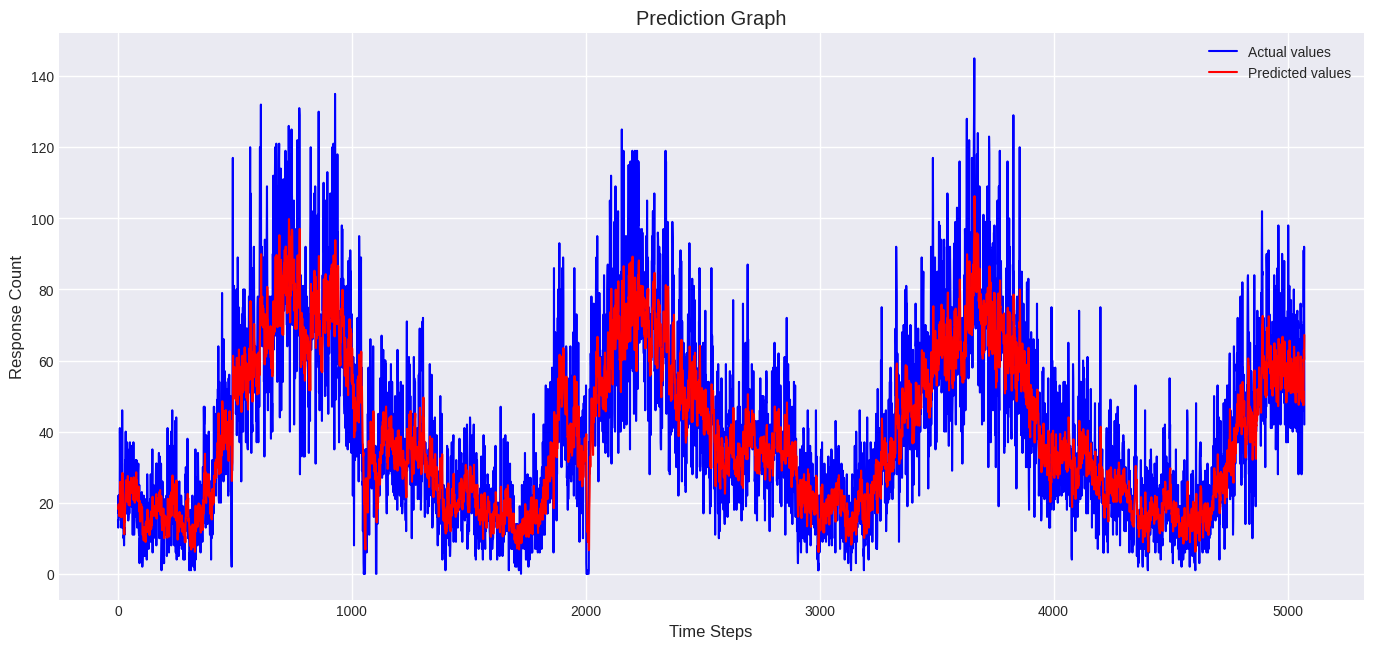

In [ ]:
# model = tf.keras.models.load_model(f"/content/drive/MyDrive/Colab_Notebooks/Transformers/model/my_model.h5")
model = tf.keras.models.load_model(f"/content/drive/MyDrive/Colab_Notebooks/Transformers/model/my_weekday_model.h5")
predictions = model.predict(x_test)

# Flatten the predictions and actual values if they are in a two-dimensional shape
predictions = predictions.flatten()
y_valid = y_test.flatten()


import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(y_valid, color='blue', label='Actual values')
plt.plot(predictions, color='red', label='Predicted values')

plt.title('Prediction Graph')
plt.xlabel('Time Steps')
plt.ylabel('Response Count')
plt.legend()
plt.show()


159/159 [==============================] - 10s 57ms/step


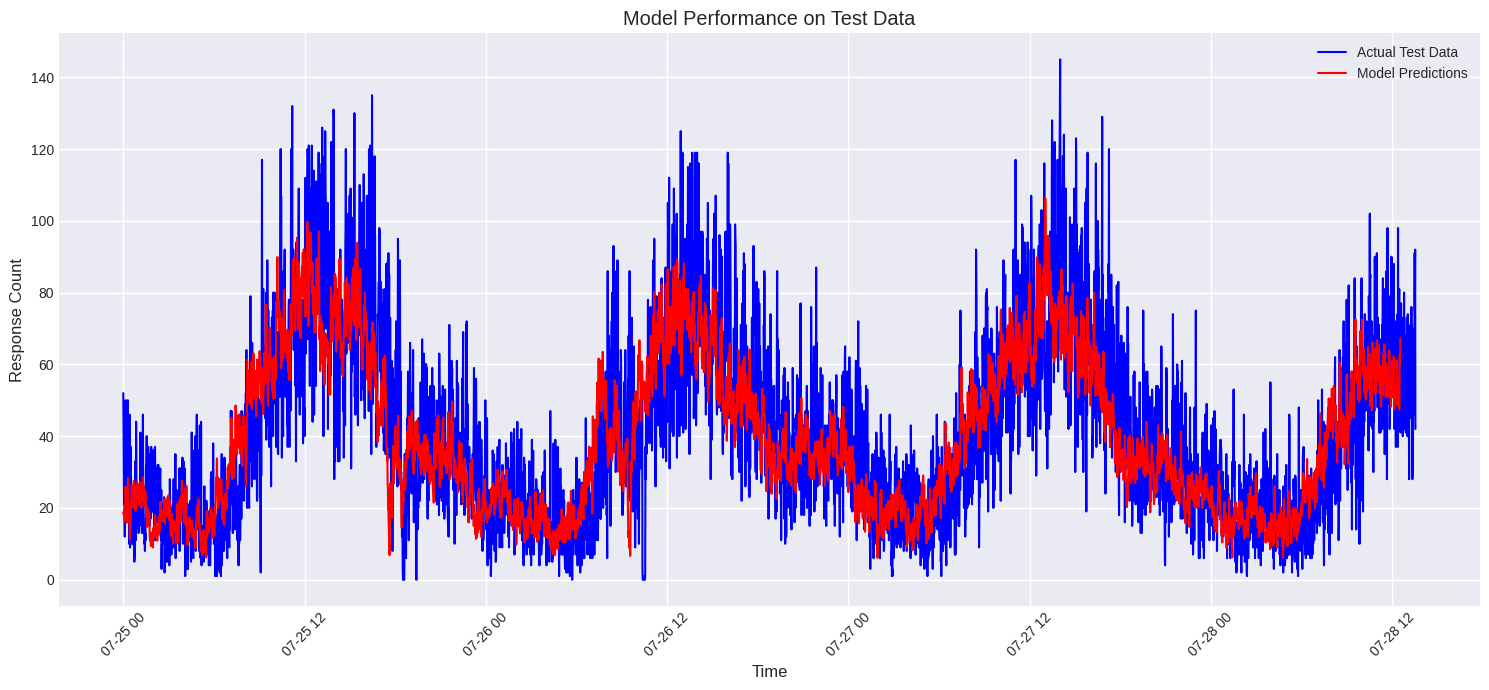

In [ ]:

model = tf.keras.models.load_model("/content/drive/MyDrive/Colab_Notebooks/Transformers/model/my_weekday_model.h5")
predictions = model.predict(x_test)
predictions = predictions.flatten()

prediction_dates = data_test.index[:len(predictions)]
predictions_series = pd.Series(predictions, index=prediction_dates)

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(data_test.index, data_test, label='Actual Test Data', color='blue')
plt.plot(predictions_series.index, predictions_series, label='Model Predictions', color='red')

plt.title('Model Performance on Test Data')
plt.xlabel('Time')
plt.ylabel('Response Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


159/159 [==============================] - 6s 33ms/step


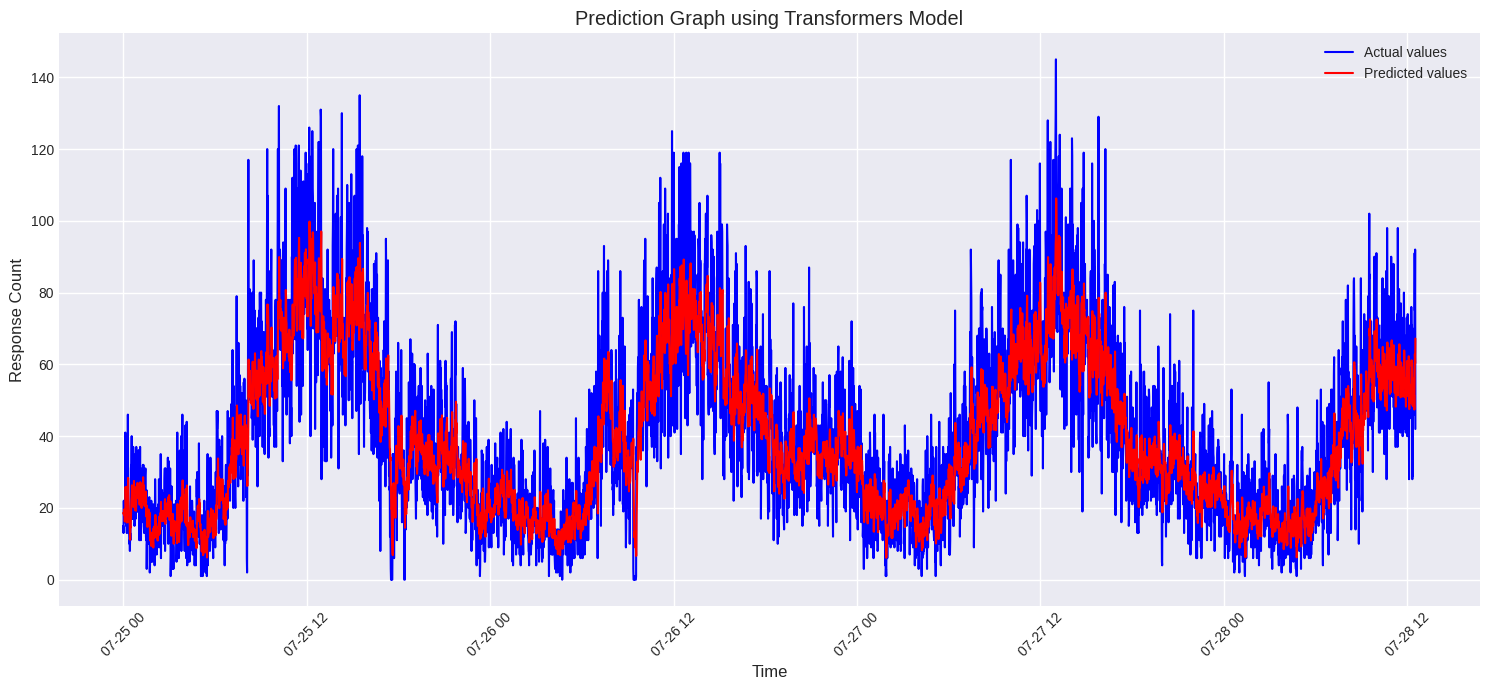

In [ ]:
model = tf.keras.models.load_model(f"/content/drive/MyDrive/Colab_Notebooks/Transformers/model/my_weekday_model.h5")

predictions = model.predict(x_test)

predictions = predictions.flatten()
y_valid = y_test.flatten()
date_range = pd.date_range(start=data_test.index.min(), periods=len(predictions), freq='1T')


plt.figure(figsize=(15, 7))
plt.plot(date_range, y_valid, color='blue', label='Actual values')
plt.plot(date_range, predictions, color='red', label='Predicted values')
plt.title('Prediction Graph using Transformers Model')
plt.xlabel('Time')
plt.ylabel('Response Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


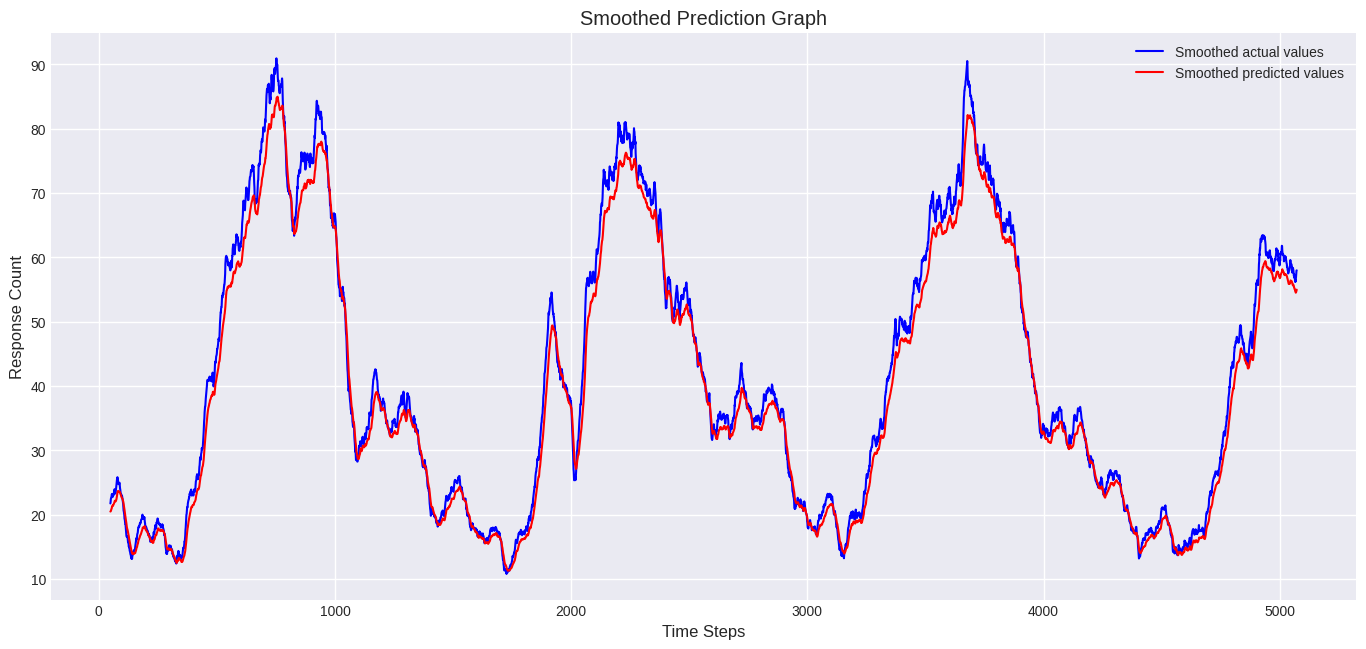

In [ ]:

actual_series = pd.Series(y_valid)
predicted_series = pd.Series(predictions)
rolling_window_size = 50

smoothed_actual = actual_series.rolling(window=rolling_window_size).mean()
smoothed_predicted = predicted_series.rolling(window=rolling_window_size).mean()

plt.figure(figsize=(15, 7))
plt.plot(smoothed_actual, color='blue', label='Smoothed actual values')
plt.plot(smoothed_predicted, color='red', label='Smoothed predicted values')

plt.title('Smoothed Prediction Graph')
plt.xlabel('Time Steps')
plt.ylabel('Response Count')

plt.legend()


plt.show()


In [ ]:
x_test, y_test = make_dataset(test_data)

test_predictions = model.predict(x_test)
test_predictions = test_predictions.flatten()
y_test = y_test.flatten()

mae = mean_absolute_error(y_test, test_predictions)
print(f"Mean Absolute Error on Test Data: {mae}")


In [ ]:
test_predictions = model.predict(x_test)
test_predictions = test_predictions.flatten()
y_test = y_test.flatten()
mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100
print(f"Mean Absolute Percentage Error on Test Data: {mape}%")


250/250 [==============================] - 4s 18ms/step
Mean Absolute Percentage Error on Test Data: inf%


In [ ]:

test_date_range = pd.date_range(start=data_test.index.min(), periods=len(test_predictions), freq='1T')


In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(test_date_range, y_test, color='blue', label='Actual values')
plt.plot(test_date_range, test_predictions, color='red', label='Predicted values')
plt.title('Test Data Prediction Graph')
plt.xlabel('Time')
plt.ylabel('Response Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: ignored

<Figure size 1500x700 with 0 Axes>

In [ ]:







actual_series = pd.Series(y_valid)
predicted_series = pd.Series(predictions)


rolling_window_size = 28
smoothed_actual = actual_series.rolling(window=rolling_window_size).mean()
smoothed_predicted = predicted_series.rolling(window=rolling_window_size).mean()

plt.figure(figsize=(15, 7))
plt.plot(smoothed_actual, color='blue', label='Smoothed actual values')
plt.plot(smoothed_predicted, color='red', label='Smoothed predicted values')
plt.title('Smoothed Prediction Graph')
plt.xlabel('Time Steps')
plt.ylabel('Response Count')

plt.legend()

plt.show()


In [ ]:
import numpy as np

def calculate_mape(y_true, y_pred):

    epsilon = 1e-10# Avoid division by zero by adding a small epsilon value
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

y_pred = model.predict(x_test)
mape = calculate_mape(y_test, y_pred)
print(f'MAPE: {mape:.2f}%')


250/250 [==============================] - 11s 43ms/step
MAPE: 154882997923.68%


In [ ]:

full_data = df['Response'].values
x_full, y_full = make_dataset(full_data)

full_predictions = model.predict(x_full)
full_predictions = full_predictions.flatten()
y_full = y_full.flatten()


1240/1240 [==============================] - 17s 14ms/step


In [ ]:

full_date_range = pd.date_range(start=df.index.min(), periods=len(full_predictions), freq='1T')


plt.figure(figsize=(15, 7))
plt.plot(full_date_range, y_full, color='blue', label='Actual values')
plt.plot(full_date_range, full_predictions, color='red', label='Predicted values')
plt.title('Full Data Range Prediction Graph')
plt.xlabel('Time')
plt.ylabel('Response Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
